In [240]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from enum import Enum
from math import atan, sqrt, tanh, erf, e, pi
from copy import copy

# Transfer Function

In [241]:
# 转移函数 V-Shape 和 S-Shape
class TransferFuncion(Enum):
    """转移函数的枚举值
    """
    V1 = 1
    V2 = 2
    V3 = 3
    V4 = 4
    S1 = 5
    S2 = 6
    S3 = 7
    S4 = 8
    
    
def transfer_function(transfer_function_type: TransferFuncion, a: float) -> float:
    """将值映射到 [0, 1] 区间的 8 种转移函数（4 种 V-Shape 和 4 种 S-Shape）

    Args:
        transfer_function_type (TransferFuncion): 转移函数类型
        a (float): 任意实数值

    Returns:
        float: 经过转移函数映射到 [0, 1] 区间的值
    """
    if transfer_function_type == TransferFuncion.V1:
        return abs((2/pi)*atan((pi/2)*a))
    
    elif transfer_function_type == TransferFuncion.V2:
        return abs(tanh(a))
        
    elif transfer_function_type == TransferFuncion.V3:
        return abs(a/(sqrt(1+a**2)))
    
    elif transfer_function_type == TransferFuncion.V4:
        return abs(erf((sqrt(pi)/2)*a))
    
    elif transfer_function_type == TransferFuncion.S1:
        return 1/(1+e**(-a))
    
    elif transfer_function_type == TransferFuncion.S2:
        return 1/(1+e**(-2*a))
    
    elif transfer_function_type == TransferFuncion.S3:
        return 1/(1+(e**(-a/2)))
    
    elif transfer_function_type == TransferFuncion.S4:
        return 1/(1+(e**(-a/3)))
    
    else:
        print('[ERROR] Unknow transfer function type, Please use V1~V4 or S1~S4')
        exit
    

## V-Shape

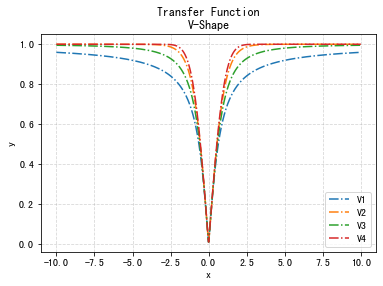

In [242]:
x = np.linspace(start=-10.0, stop=10.0, num=1000)

plt.figure()

for tf in [TransferFuncion.V1, TransferFuncion.V2, TransferFuncion.V3, TransferFuncion.V4]:
    y = [transfer_function(tf, a) for a in x]
    plt.plot(x, y, linestyle='-.')
    
plt.title('Transfer Function\nV-Shape')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(['V1', 'V2', 'V3', 'V4'], loc='lower right')
plt.show()

## S-Shape

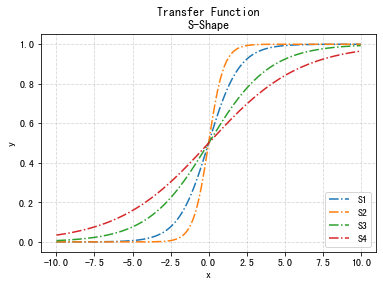

In [243]:
plt.figure()

for tf in [TransferFuncion.S1, TransferFuncion.S2, TransferFuncion.S3, TransferFuncion.S4]:
    y = [transfer_function(tf, a) for a in x]
    plt.plot(x, y, linestyle='-.')
    
plt.title('Transfer Function\nS-Shape')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(['S1', 'S2', 'S3', 'S4'], loc='lower right')
plt.show()

## 将物品列表中的随机数转换为二元的 0 或 1

In [244]:
def to_binary(tf: TransferFuncion, arr2binary: np.ndarray) -> np.ndarray:
    """将连续值转化为二进制值

    Args:
        tf (TransferFuncion): 随机所使用的转移函数
        arr2binary (np.ndarray): 待二元化数组

    Returns:
        np.ndarray: 经过转移函数映射过后生成的二元数组
    """
    return np.array([1 if transfer_function(tf, a) >= 0.5 else 0 for a in arr2binary])  #TODO 替换成 rand()
    

# 初始化函数


## 是否放入物品表

In [245]:
def initialization(Particles_no: int, dim: int) -> np.ndarray:
    """生成一个 Particles_no 行，dim 列的数组 C

    Args:
        Particles_no (int): _description_
        dim (int): _description_

    Returns:
        np.ndarray: _description_
    """
    C = np.zeros(shape=(Particles_no, dim))
    
    for i in range(Particles_no):
        for j in range(dim):
            if np.random.rand() <= 0.5:
                C[i, j] = 0
            else:
                C[i, j] = 1
                
    return C

## 生成随机物品价值表

In [246]:
def get_price_table(n: int, min_price: int, max_price: int) -> np.ndarray:
    """生成物品价值表（n行，1列），也就是对应 n 个物品。价值的范围为：[min_price, max_price]

    Args:
        n (int): 物品数量
        min_price (int): 最小价值（大于 0）
        max_price (int): 最大价值（大于最小价值）

    Returns:
        np.ndarray: 一维数组
    """
    if n < 0:
        print('[ERROR] n CAN NOT small than 1')
        exit
    
    if (min_price < 1) or (max_price <= min_price):
        print('[ERROR] min_price CAN NOT small than 1 and max_price CAN NOT small than min_price')
        exit
    
    return np.random.randint(low=min_price + 1, high=max_price + 1, size=n)

## 生成随机物品重量表

In [247]:
def get_weight_table(n: int, min_weight: int, max_weight: int) -> np.ndarray:
    """生成物品重量表（n行，1列），也就是对应 n 个物品。重量的范围为：[min_weight, max_weight]

    Args:
        n (int): 物品熟练
        min_weight (int): 最小重量（大于 0）
        max_weight (int): 最大重量（大于最小重量）

    Returns:
        np.ndarray: 一维数组
    """
    if n < 0:
        print('[ERROR] n CAN NOT small than 1')
        exit
    
    if (min_weight < 1) or (max_weight <= min_weight):
        print('[ERROR] min_weight CAN NOT small than 1 and max_weight CAN NOT small than min_weight')
        exit
    
    return np.random.randint(low=min_weight + 1, high=max_weight + 1, size=n)

## 适应度函数（RF - 惩罚函数）

In [248]:
def get_fitness(arr_binary: np.ndarray, arr_price: np.ndarray, arr_weight: np.ndarray, knapsack_capacity: int) -> np.int32:
    """【Fitness function】获取适应度，也就是放入背包的物品。如果不能放入背包则适应度为负数（惩罚函数）

    Args:
        arr_binary (np.ndarray): 二元化后的数组
        arr_price (np.ndarray): 价值数组
        arr_weight (np.ndarray): 重量数组
        knapsack_capacity (int): 背包容量

    Returns:
        np.int32: 适应度
    """
    if arr_binary.shape != arr_price.shape or arr_price.shape != arr_weight.shape:
        print('[ERROR] arr_binary, arr_price, arr_weight should have same shape')
        exit
    
    sum_price = 0
    sum_weight = 0
    for i in range(arr_binary.shape[0]):
        if 0 == arr_binary[i]:
            continue
        sum_price += arr_price[i]
        sum_weight += arr_weight[i]
        
    if sum_weight > knapsack_capacity:
        sum_weight = -sum_weight
        
    return sum_weight

## 最大值物品的下标

In [249]:
def get_index_max_price(arr_price: np.ndarray) -> int:
    """获取最大价值物品的下标

    Args:
        arr_price (np.ndarray): 存储物品价值的数组

    Returns:
        int: 最大价值物品的下标
    """
    return arr_price.tolist().index(arr_price.max())

## 最小值物品的下标

In [250]:
def get_index_min_price(arr_price: np.ndarray) -> int:
    """获取最小价值物品的下标

    Args:
        arr_price (np.ndarray): 存储物品价值的数组

    Returns:
        int: 最小价值物品的下标
    """
    return arr_price.tolist().index(arr_price.mix())

## 获取「不在」背包中性价比最大物品的下标

In [251]:
def get_index_max_cost_performance(arr_binary: np.ndarray, arr_price: np.ndarray, arr_weight: np.ndarray) -> int:
    """返回不在背包中性价比最大物品的下标
    性价比：p_i/w_i

    Args:
        arr_binary (np.ndarray): 二元化后的数组（一维）
        arr_price (np.ndarray): 价值数组
        arr_weight (np.ndarray): 重量数组

    Returns:
        int: 不在背包中性价比最大物品的下标
    """
    if arr_binary.shape != arr_price.shape or arr_price.shape != arr_weight.shape:
        print('[ERROR] arr_binary, arr_price, arr_weight should have same shape')
        exit
        
    index_max_cp = None
    max_cp = None
    for i in range(arr_binary.shape[0]): #TODO
        if 1 == arr_binary[i]:
            continue
        
        current_cp = arr_price[i] / arr_weight[i]
        if max_cp is None or current_cp > max_cp:
            max_cp = current_cp
            index_max_cp = i
            
    return index_max_cp

## 获取「背包中」性价比最小物品的下标

In [252]:
def get_index_min_cost_performance(arr_binary: np.ndarray, arr_price: np.ndarray, arr_weight: np.ndarray) -> int:
    """返回背包中性价比最小物品的下标
    性价比：p_i/w_i

    Args:
        arr_binary (np.ndarray): 二元化后的数组（一维）
        arr_price (np.ndarray): 价值数组
        arr_weight (np.ndarray): 重量数组

    Returns:
        int: 背包中性价比最小物品的下标
    """
    if arr_binary.shape != arr_price.shape or arr_price.shape != arr_weight.shape:
        print('[ERROR] arr_binary, arr_price, arr_weight should have same shape')
        exit
        
    index_min_cp = None
    min_cp = None
    for i in range(arr_binary.shape[0]):
        if 0 == arr_binary[i]:
            continue
        
        current_cp = arr_price[i] / arr_weight[i]
        if min_cp is None or current_cp < min_cp:
            min_cp = current_cp
            index_min_cp = i
            
    return index_min_cp

# 修复不可行解

## RA - 修复算法

Repari Algorithm, 其作用是修正PF算法返回的不可行解

**在修复算法中:** 

1. $\frac{\mathrm{p}_{i}}{\mathrm{w}_{i}}$ 值最低的物品是从背包中取出的。 

2. 对新解决方案进行评估

3. 检查新解决方案的可行性，如果不可行，则重复步骤1和2，直到找到可行的解决方案(参见算法3)。

In [253]:
def repari_alg(arr_binary: np.ndarray, arr_price: np.ndarray, arr_weight: np.ndarray, knapsack_capacity: int) -> np.ndarray:
    """RA - 修复算法，其作用是修正PF算法（惩罚函数）返回的不可行解。并「返回」修复后的新组

    Args:
        arr_binary (np.ndarray): 二元化后的数组（一维）
        arr_price (np.ndarray): 价值数组
        arr_weight (np.ndarray): 重量数组
        knapsack_capacity (int): 背包容量

    Returns:
        np.ndarray: RA 算法修复后的新行（一维数组）
    """
    arr_binary = copy(arr_binary)
    while get_fitness(arr_binary, arr_price, arr_weight, knapsack_capacity) < 0:
        index_min_cp = get_index_min_cost_performance(arr_binary, arr_price, arr_weight)
        arr_binary[index_min_cp] = 0
        
    return arr_binary

## IM - 改进算法

Improvement Algorithm, 其作用是改进RA返回的可行解

**在改进算法中：**

1. $\frac{\mathrm{p}_{i}}{\mathrm{w}_{i}}$ 比值最高的物品被选择在背包中

2. 对新解决方案进行评估

3. 检查新解决方案的可行性，如果不可行，则删除背包中最后选择的项目，并终止改进过程(如算法4所示)。

In [254]:
def improvement_alg(arr_binary: np.ndarray, arr_price: np.ndarray, arr_weight: np.ndarray, knapsack_capacity: int) -> np.ndarray:
    """IM - 改进算法，其作用是改进RA（修复算法）返回的可行解。并「返回」改进后的新组
    Args:
        arr_binary (np.ndarray): 二元化后的数组（一维）
        arr_price (np.ndarray): 价值数组
        arr_weight (np.ndarray): 重量数组
        knapsack_capacity (int): 背包容量
    Returns:
        np.ndarray: IM 算法改进后的新行（一维数组）
    """
    arr_binary = copy(arr_binary)
    last_array = copy(arr_binary) # 暂存改进前的数组
    while get_fitness(arr_binary, arr_price, arr_weight, knapsack_capacity) > 0:
        last_array = copy(arr_binary)
        index_max_cp = get_index_max_cost_performance(arr_binary, arr_price, arr_weight)
        arr_binary[index_max_cp] = 1
     
    return last_array

# 说明性的例子

In [258]:
arr_binary = np.array([0, 1, 1])
arr_price = np.array([5, 10, 15])
arr_weight = np.array([2, 30, 10])
knapsack_capacity = 15

print('\n', '>' * 20, '根据原本数据：')
print('背包内容：', arr_binary)
print('适应度（惩罚函数）：', get_fitness(arr_binary, arr_price, arr_weight, knapsack_capacity))
print('背包「中」性价比最低的物品的下标：', get_index_min_cost_performance(arr_binary, arr_price, arr_weight))

# 调用修复算法
print('\n', '>' * 20, '\n调用修复算法:')
arr_binary = repari_alg(arr_binary, arr_price, arr_weight, knapsack_capacity)
print('调用修复算法后的适应度（惩罚函数）：', get_fitness(arr_binary, arr_price, arr_weight, knapsack_capacity))
print('背包内容：', arr_binary)

# 调用改进算法
print('\n', '>' * 20, '\n调用改进算法:')
print('「不在背包」性价比最高的物品的下标：', get_index_max_cost_performance(arr_binary, arr_price, arr_weight))
print('调用改进算法后的适应度（惩罚函数）：', get_fitness(arr_binary, arr_price, arr_weight, knapsack_capacity))
arr_binary = improvement_alg(arr_binary, arr_price, arr_weight, knapsack_capacity)
print('调用改进算法后的适应度（惩罚函数）：', get_fitness(arr_binary, arr_price, arr_weight, knapsack_capacity))
print('背包内容：', arr_binary)


 >>>>>>>>>>>>>>>>>>>> 根据原本数据：
背包内容： [0 1 1]
适应度（惩罚函数）： -40
背包「中」性价比最低的物品的下标： 1

 >>>>>>>>>>>>>>>>>>>> 
调用修复算法:
调用修复算法后的适应度（惩罚函数）： 10
背包内容： [0 0 1]

 >>>>>>>>>>>>>>>>>>>> 
调用改进算法:
「不在背包」性价比最高的物品的下标： 0
调用改进算法后的适应度（惩罚函数）： 10
调用改进算法后的适应度（惩罚函数）： 12
背包内容： [1 0 1]


# 程序入口

In [256]:
max_iters = 5000
num_groups_particle = 20 # 几组粒子
num_particles_every_group = 10  # 每组里有多少个粒子（dim 维度）
num_runs = 20
a_1 = 3
a_2 = 1
min_price = 5  # 一个物体最小的价值
max_price = 30 # 一个物体最大的价值
min_weight = 5  # 一个物体最小的重量（体积）
max_weight = 30 # 一个物体最大的重量（体积）
knapsack_capacity = 50  # 背包体积


for irun in range(1, num_runs + 1):
    print('--------------------------------------')
    # ------------- 4 个候选者 -------------
    Ceq_1 = np.zeros(num_particles_every_group)
    Ceq_1_fit = float('inf')
    Ceq_2 = np.zeros(num_particles_every_group)
    Ceq_2_fit = float('inf')
    Ceq_3 = np.zeros(num_particles_every_group)
    Ceq_3_fit = float('inf')
    Ceq_4 = np.zeros(num_particles_every_group)
    Ceq_4_fit = float('inf')
    
    C_old = np.zeros(shape=(num_groups_particle, num_particles_every_group))
    DeltaC = np.zeros(shape=(num_groups_particle, num_particles_every_group))
    V = np.zeros(shape=(num_groups_particle, num_particles_every_group))
    Convergence_curve = np.zeros(num_particles_every_group)
    Ceqfit_run = np.zeros(num_runs)
    
    C = initialization(num_groups_particle, num_particles_every_group)  # 0-1 值，物品是否放入背包
    arr_price = get_price_table(n=num_particles_every_group, min_price=min_price, max_price=max_price)
    arr_weight = get_weight_table(n=num_particles_every_group, min_weight=min_weight, max_weight=max_weight)
    
    it = 0
    while it < max_iters:
        print(f'[INFO] irun: {irun}\t|\tit: {it}/{max_iters}')
        for i in C:
            fitness = get_fitness(arr_binary=i, arr_price=arr_price, arr_weight=arr_weight, knapsack_capacity=knapsack_capacity)
            if fitness < Ceq_1_fit:
                print('[INFO] Update Ceq_1')
                Ceq_1_fit = fitness
                Ceq_1 = i
            elif (fitness > Ceq_1_fit) and (fitness < Ceq_2_fit):
                print('[INFO] Update Ceq_2')
                Ceq_2_fit = fitness
                Ceq_2 = i
            elif (fitness > Ceq_1_fit) and (fitness > Ceq_2_fit) and (fitness < Ceq_3_fit):
                print('[INFO] Update Ceq_3')
                Ceq_3_fit = fitness
                Ceq_3 = i
            elif (fitness > Ceq_1_fit) and (fitness > Ceq_2_fit) and (fitness > Ceq_3_fit) and (fitness < Ceq_4_fit):
                print('[INFO] Update Ceq_4')
                Ceq_4_fit = fitness
                Ceq_4 = i
            else:
                # print('[ERROR] in update Ceq')
                pass
                
        # ---------------- Memory saving -------------------   
        # No need
        #-------------------------------------------------
        
        Ceq_ave = np.round((Ceq_1 + Ceq_2 + Ceq_3 + Ceq_4) / 4)  # 均衡池候选者的平均值
        C_pool = np.array([Ceq_1, Ceq_2, Ceq_3, Ceq_4, Ceq_ave]) # 均衡池
        
        t = (1 - it / max_iters) ** (a_2 * it / max_iters)  # Eq(4)
        GP = 0.5
        
        for i in range(num_groups_particle):
            lambda_F = np.random.random(num_particles_every_group)
            r = np.random.random(num_particles_every_group)
            Ceq = C_pool[np.random.randint(C_pool.shape[0])]  # random selection of one candidate from the pool
            F = a_1 * np.sign(r - 0.5) * (np.exp(-lambda_F * t) - 1)  # Eq(3)
            GCP = 0.5 * np.random.random() * np.ones(num_particles_every_group) * (np.random.random() > GP)  # Eq(9)
            G_0 = GCP * (Ceq - lambda_F * C[i])  # Eq(8)
            G = G_0 * F  # Eq(7)
            DeltaC[i] = (C[i] - Ceq) * F + (G / lambda_F) * (1 - F) # Eq(10)
            C[i] = Ceq + DeltaC[i] # Eq(10) TODO
            print(f'[--> INFO] C[i]: {C[i]}')
        
        it += 1
        Convergence_curve[i] = Ceq_1_fit
        Ceqfit_run[i] = Ceq_1_fit

[INFO] irun: 1
[INFO] irun: 1	|	it: 0/5000
[INFO] Update Ceq_1
[INFO] Update Ceq_1
[INFO] Update Ceq_2
[INFO] Update Ceq_2
[INFO] Update Ceq_3
[INFO] Update Ceq_3
[INFO] Update Ceq_3
[INFO] Update Ceq_4
[INFO] Update Ceq_4
[INFO] Update Ceq_2
[INFO] Update Ceq_4
[INFO] Update Ceq_2
[INFO] Update Ceq_4
[--> INFO] C[i]: [ 2.7006696   1.28987488  1.98721152  0.95571692 -1.34842283  0.
  0.78816813  1.66794706  2.50546315  1.          0.          0.
  0.55975253  1.18083673  1.          2.03282794 -0.87459599  0.98140911
  1.43923636  1.        ]
[--> INFO] C[i]: [ 0.40437237  1.          1.          2.0503123   1.68946266  2.00859005
  0.32777362  1.         -1.56473508  1.          0.          0.
  1.         -1.18930271  1.         -1.11716672  0.          1.25011984
  1.         -1.82651834]
[--> INFO] C[i]: [ 0.          2.35384694  1.          1.          1.          1.
  2.55740585  2.83172388  0.          1.          0.          1.4089945
  0.          1.          1.05554212 -1.479

KeyboardInterrupt: 